In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pickle
import time
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import SimpleITK as sitk

from IPython import display

from nn_model import NNModel
from roi_queue import ROIQueue
from stat_helper import *

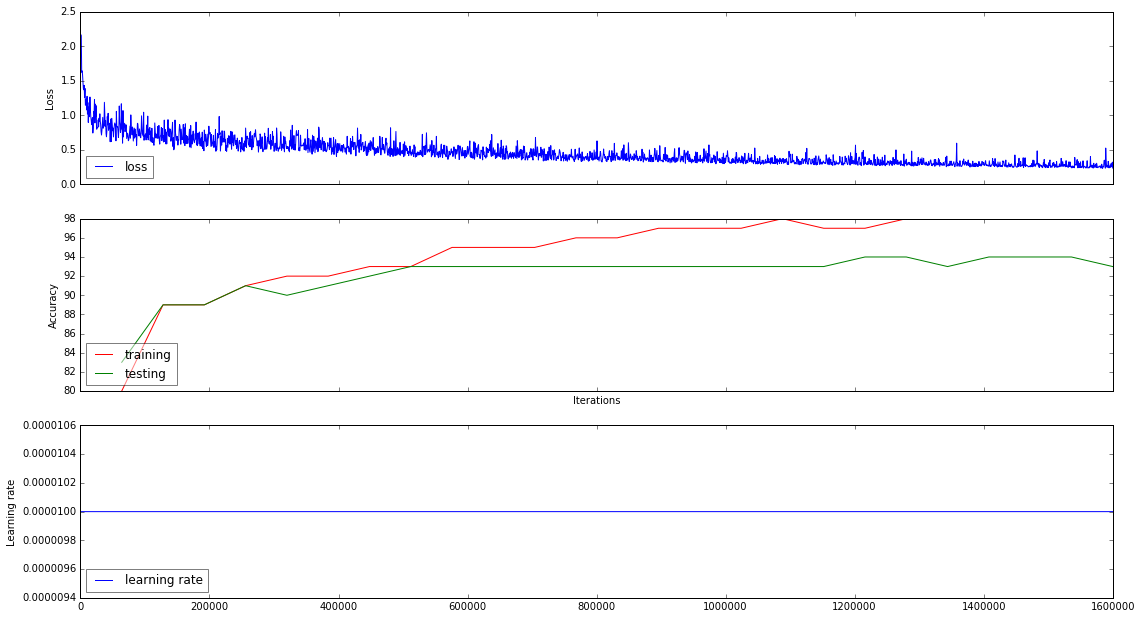

Iter 1600000, Loss = 0.234411, Training Accuracy = 98.000, Test Accuracy = 93.000
Optimization Terminated!


In [53]:
network = """[{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 20,
		"stride": 1,
		"maintain_spatial": false
	},{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{

		"type": "fc",
		"count": 1024
	}]
"""

run_graph('exported_rois.p', network, iterations=1e7, batch_size=32)

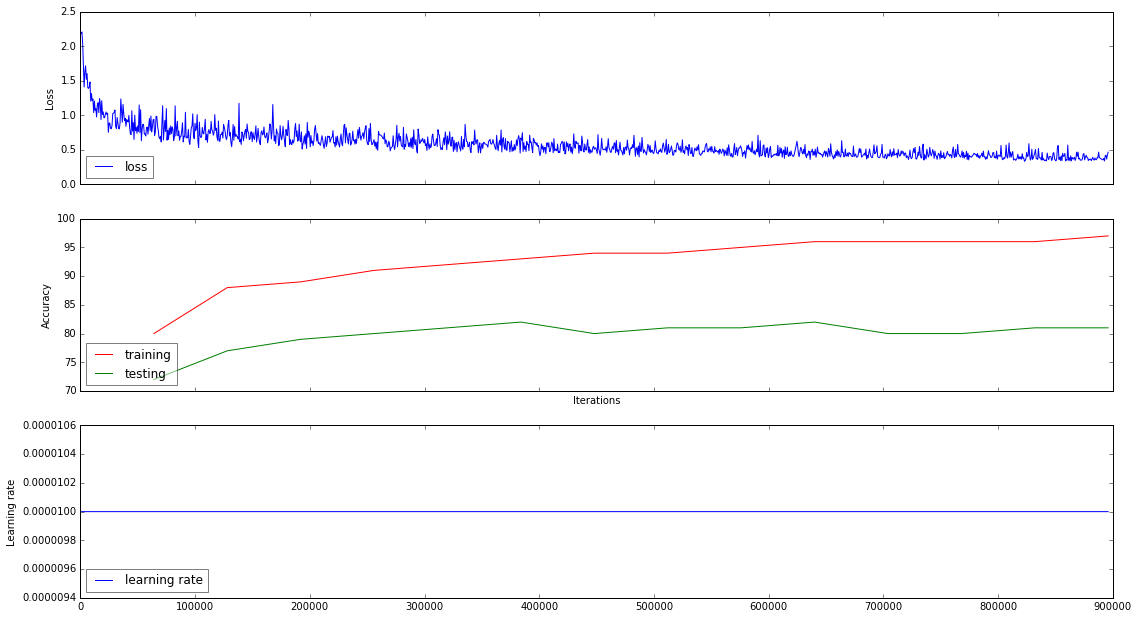

Iter 896000, Loss = 0.465571, Training Accuracy = 97.000, Test Accuracy = 81.000
Optimization Terminated!


In [3]:
network = """[{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 20,
		"stride": 1,
		"maintain_spatial": false
	},{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{

		"type": "fc",
		"count": 1024
	}]
"""

run_graph(
    'exported_rois.p', 
    network, 
    iterations=1e7, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 3)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 90))
    }
)

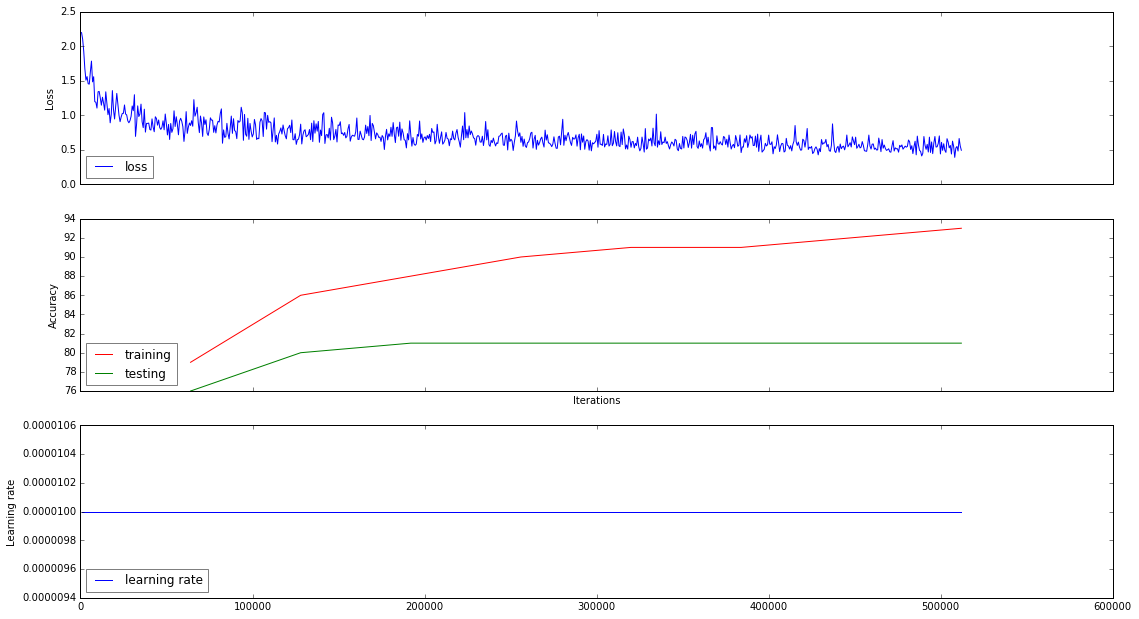

Iter 512000, Loss = 0.492811, Training Accuracy = 93.000, Test Accuracy = 81.000
Optimization Terminated!


In [4]:
network = """[{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 20,
		"stride": 1,
		"maintain_spatial": false
	},{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{

		"type": "fc",
		"count": 1024
	}]
"""

run_graph(
    'exported_rois.p', 
    network, 
    iterations=1e7, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 90))
    }
)

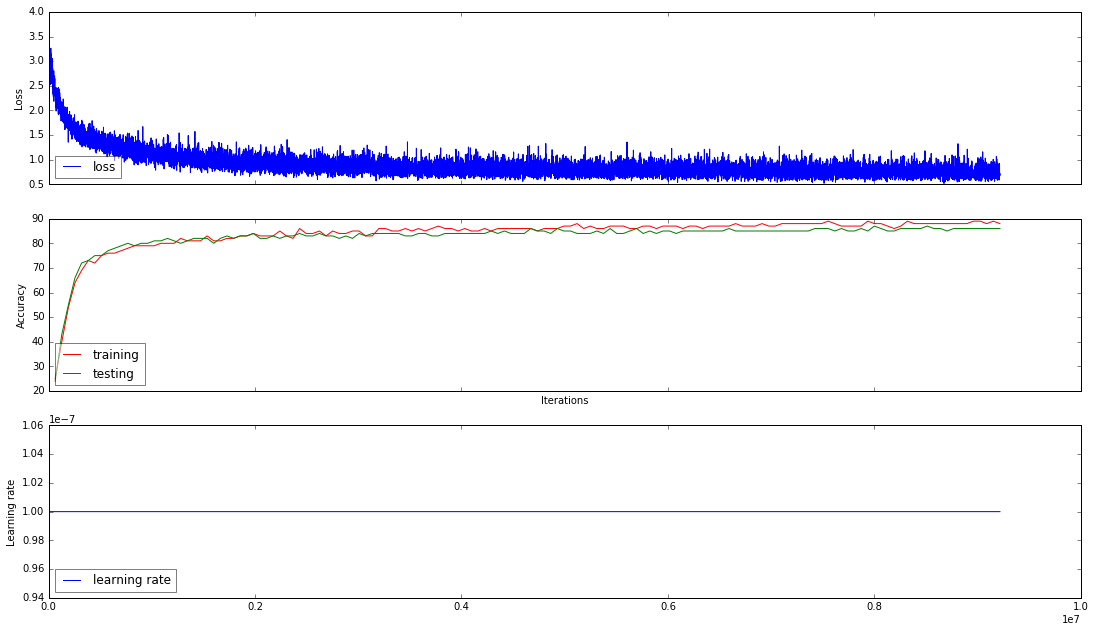

Iter 9216000, Loss = 0.710316, Training Accuracy = 88.000, Test Accuracy = 86.000
Optimization Terminated!


In [8]:
network = """[{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 20,
		"stride": 1,
		"maintain_spatial": false
	},{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{

		"type": "fc",
		"count": 1024
	}]
"""

run_graph(
    'exported_rois.p', 
    network,
    learning_rate=1e-7,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

In [4]:
network = """[{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 20,
		"stride": 1,
		"maintain_spatial": false
	},{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{

		"type": "fc",
		"count": 1024
	}]
"""

run_graph(
    'exported_rois.p', 
    network,
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

Iter 12416000, Loss = 0.353823, Training Accuracy = 99.000, Test Accuracy = 89.000
Optimization Terminated!


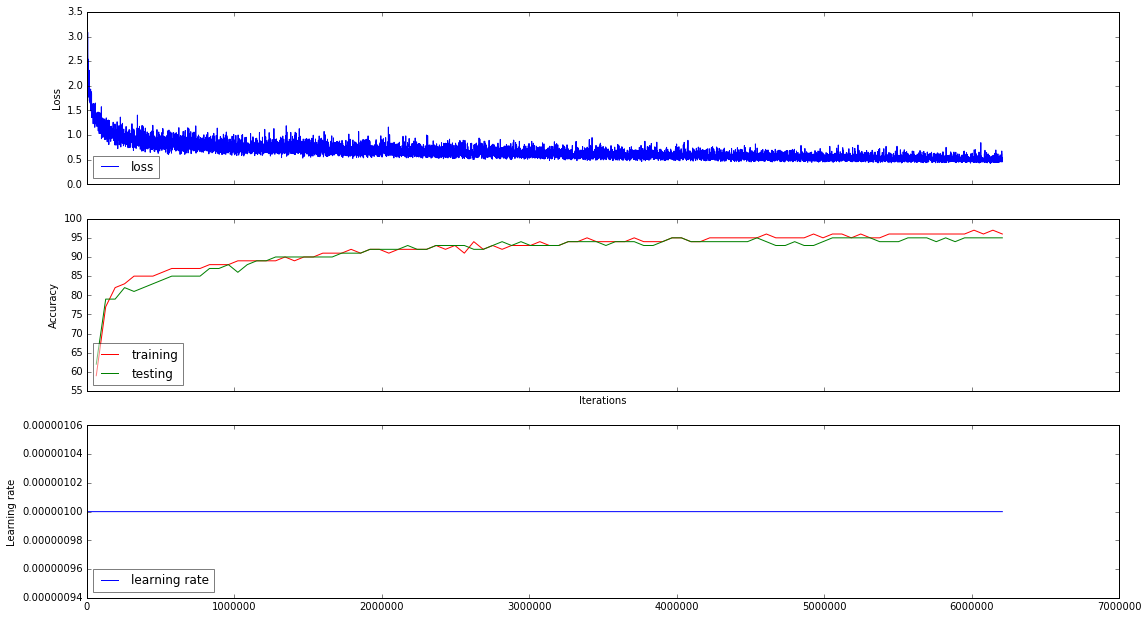

Iter 6208000, Loss = 0.474793, Training Accuracy = 96.000, Test Accuracy = 95.000
Optimization Terminated!


In [3]:
network = """[{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{
		"type": "conv",
		"filter_size": 5,
		"filter_count": 50,
		"stride": 1,
		"maintain_spatial": false
	},{

		"type": "fc",
		"count": 1024
	}]
"""

run_graph(
    'exported_rois.p', 
    network,
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

In [4]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 23, 1]}, 6).train(
    'exported_rois.p',
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

Iter 4217600, Loss = 0.564618, Training Accuracy = 94.000, Test Accuracy = 84.000
Optimization Terminated!


In [2]:
# Not enforcing class distrubtion in datasets
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 23, 1]}, 6).train(
    'exported_rois.p',
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

Iter 908800, Loss = 0.895126, Training Accuracy = 84.000, Test Accuracy = 82.000
Optimization Terminated!


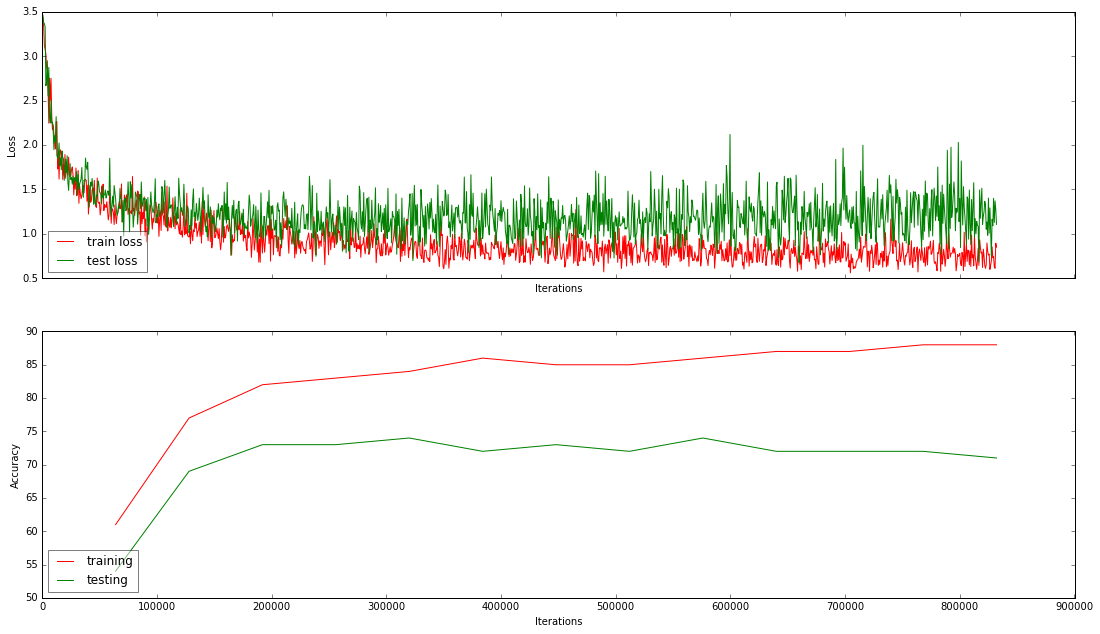

Iter 832000, Loss = 0.850129, Training Accuracy = 88.000, Test Accuracy = 71.000
Optimization Terminated!


In [2]:
# Not enforcing class distrubtion in datasets
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 23, 1]}, 6).train(
    'exported_rois.p',
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 360))
    }
)

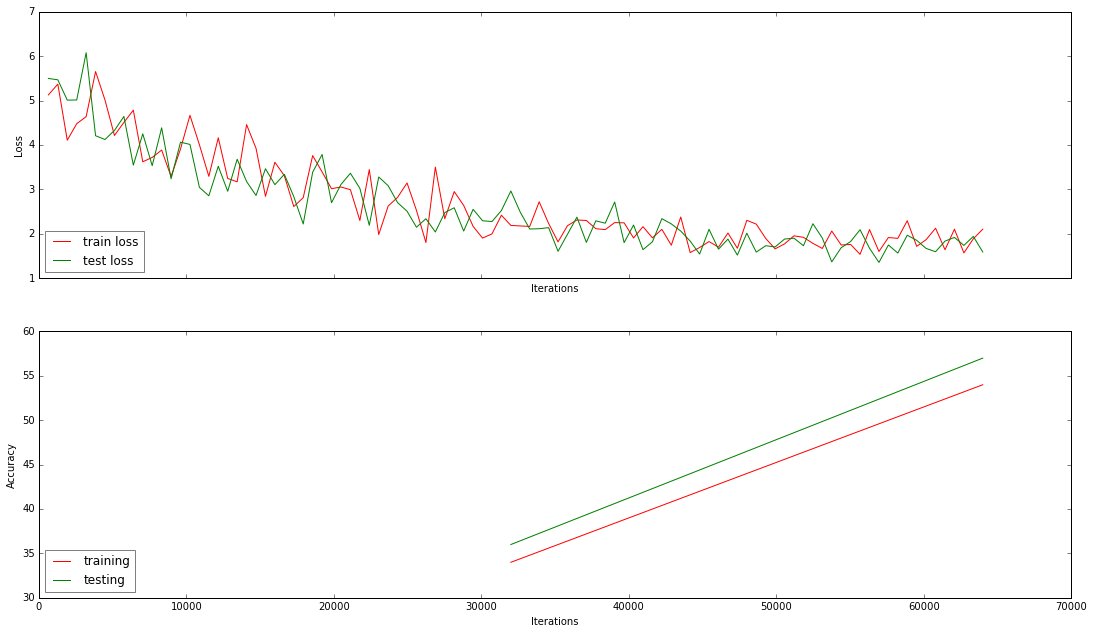

Iter 64000, Loss = 2.105413, Training Accuracy = 54.000, Test Accuracy = 57.000


StopIteration: 

In [5]:
network = """[{
    "id": "data",
    "arch": [{
      "type": "fc",
      "count": 16
    }]
},{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""

def set_item_data(X, roi):
    X["data"] = roi.roi_center
    return X

NNModel(network, {
        'image':  [15, 15, 23, 1],
        'data': [3]
    }, 6).train(
    'exported_rois.p',
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    engine=set_item_data,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    },
)

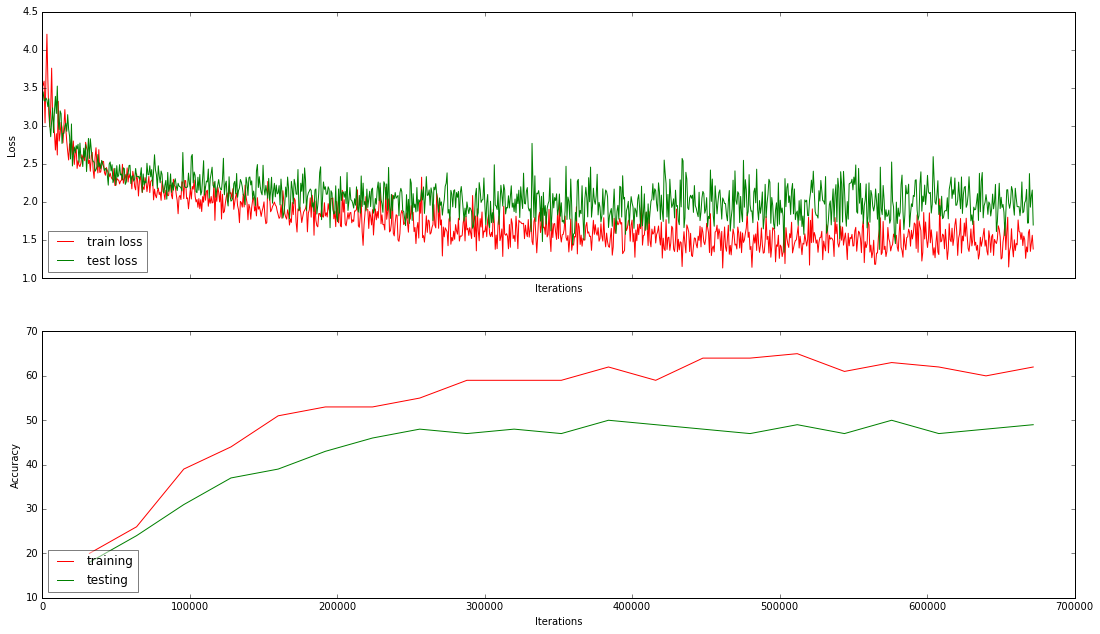

Iter 672000, Loss = 1.383953, Training Accuracy = 62.000, Test Accuracy = 49.000
Optimization Terminated!


In [3]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 5,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 15, 1]}, 6).train(
    'scaled_corrected.p',
    learning_rate=1e-6,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

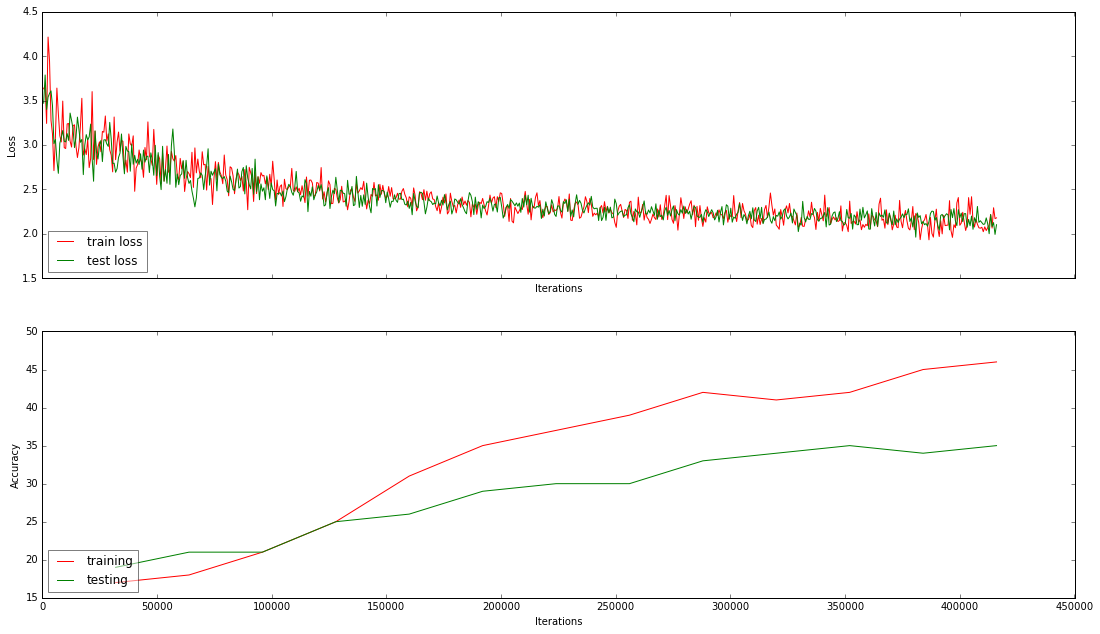

Iter 416000, Loss = 2.179982, Training Accuracy = 46.000, Test Accuracy = 35.000
Optimization Terminated!


In [6]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 15, 1]}, 6).train(
    'scaled_corrected.p',
    learning_rate=1e-7,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

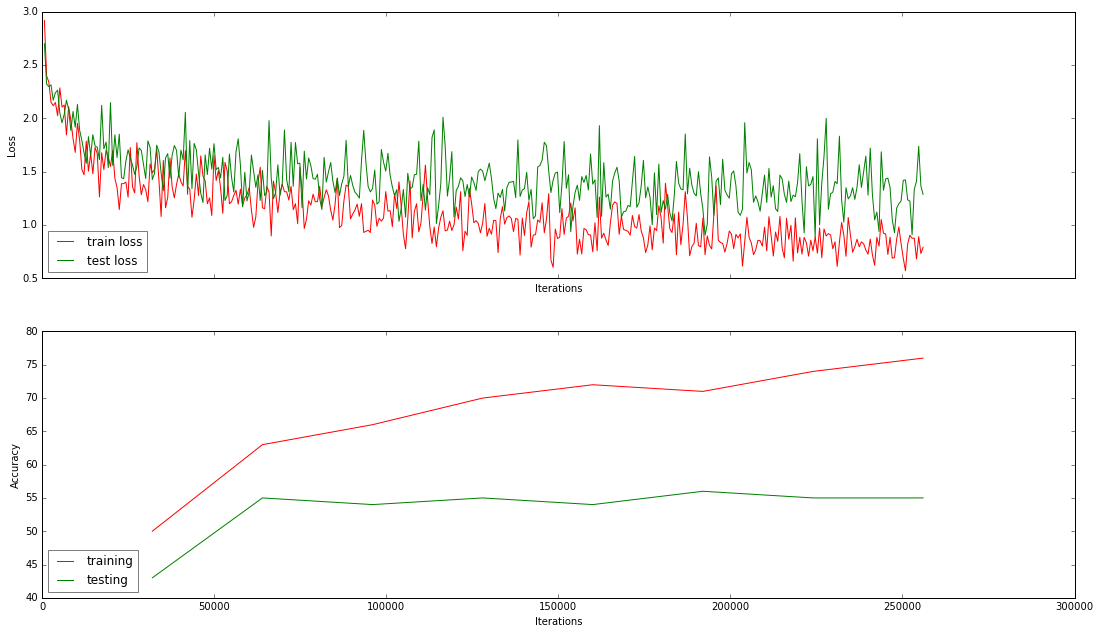

Iter 256000, Loss = 0.790555, Training Accuracy = 76.000, Test Accuracy = 55.000


StopIteration: 

In [7]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 15, 1]}, 6).train(
    'scaled_corrected.p',
    learning_rate=1e-4,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 5)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

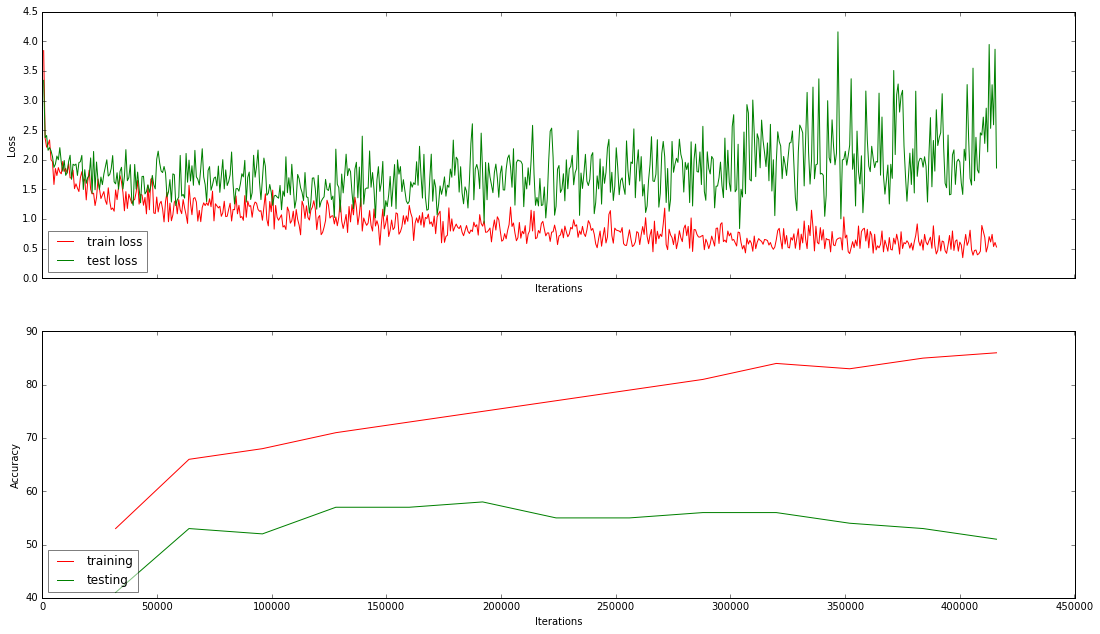

Iter 416000, Loss = 0.527563, Training Accuracy = 86.000, Test Accuracy = 51.000
Optimization Terminated!


In [2]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 15, 1]}, 6).train(
    'scaled_corrected.p',
    learning_rate=1e-4,
    iterations=1e8, 
    batch_size=32,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 90)),
        'test': list(range(0, 360, 180))
    }
)

In [8]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 30,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 6).train(
    'datasets/scaled_repeat_6.p',
    learning_rate=1e-4,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

Iter 836640, Loss = 0.163831, Training Accuracy = 95.000, Test Accuracy = 93.000
Optimization Terminated!


In [9]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 30,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 6).train(
    'datasets/scaled_repeat_6.p',
    learning_rate=1e-7,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

Optimization Terminated!


In [2]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "fc",
      "count": 12150 
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 6).train(
    'datasets/scaled_repeat_6.p',
    learning_rate=1e-7,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

Iter 1728000, Loss = 6.048808, Training Accuracy = 54.000, Test Accuracy = 47.000
Optimization Terminated!


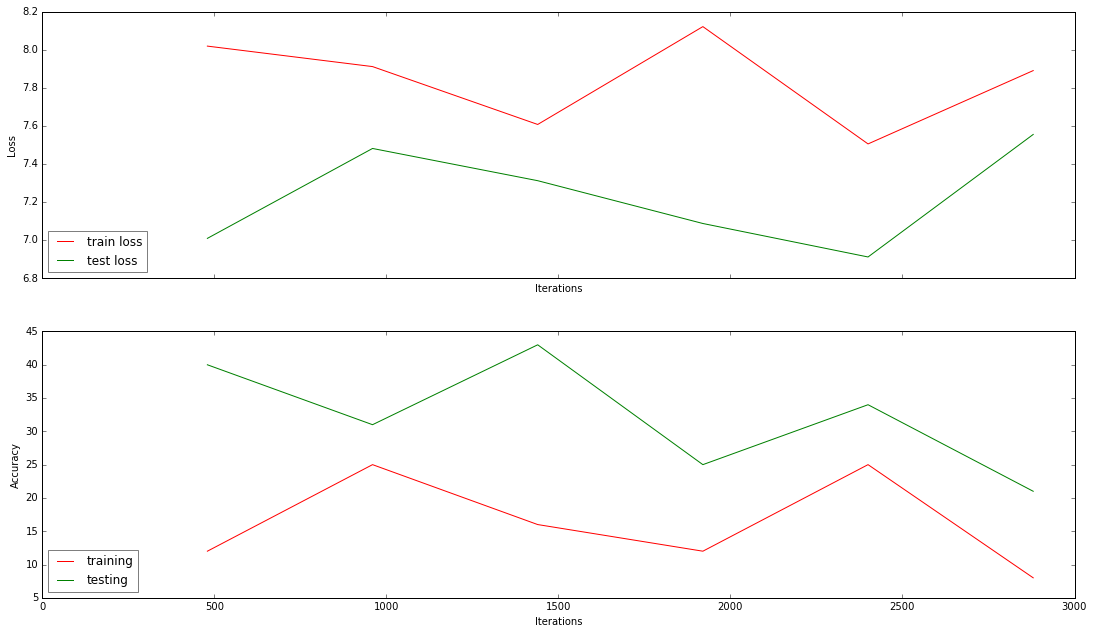

Iter 2880, Loss = 7.891469, Training Accuracy = 8.000, Test Accuracy = 21.000
Hello World! 0.21875 


 Predicted  False  True  All
Actual                     
0              4     6   10
2              5     0    5
3              2     0    2
4              8     4   12
5              2     1    3
All           21    11   32

	------------------------------------------------------


 Predicted  0  1  4   5  All
Actual                     
0          5  1  2   2   10
2          1  0  2   2    5
3          0  0  0   2    2
4          0  0  3   9   12
5          0  0  0   3    3
All        6  1  7  18   32

              precision    recall  f1-score   support

          0       0.83      0.50      0.62        10
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         5
          3       0.00      0.00      0.00         2
          4       0.43      0.25      0.32        12
          5       0.17      1.00      0.29         3

avg / total   

/home/mostafa/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mostafa/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Optimization Terminated!


In [2]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "fc",
      "count": 12150 
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 6).train(
    'datasets/scaled_repeat_6.p',
    learning_rate=1e-7,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

In [4]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 30,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 6).train(
    'datasets/scaled_repeat_6.p',
    learning_rate=1e-4,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

Iter 40320, Loss = 0.573827, Training Accuracy = 91.000, Test Accuracy = 90.000
Hello World! 0.956522 


 Predicted  False  True  All
Actual                     
0              1    32   33
1              0    10   10
2              0     7    7
3              0    11   11
4              2    14   16
5              0    15   15
All            3    89   92

	------------------------------------------------------


 Predicted   0   1  2   3   4   5  All
Actual                               
0          32   0  0   1   0   0   33
1           0  10  0   0   0   0   10
2           0   0  7   0   0   0    7
3           0   0  0  11   0   0   11
4           0   0  0   2  14   0   16
5           0   0  1   0   0  14   15
All        32  10  8  14  14  14   92

              precision    recall  f1-score   support

          0       1.00      0.97      0.98        33
          1       1.00      1.00      1.00        10
          2       0.88      1.00      0.93         7
          3       0.79   

In [5]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 30,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 6).train(
    'datasets/scaled_repeat_6.p',
    learning_rate=1e-4,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)

Iter 305280, Loss = 0.339053, Training Accuracy = 87.000, Test Accuracy = 96.000
Hello World! 0.923913 


 Predicted  False  True  All
Actual                     
0              0    29   29
1              0     3    3
2              0    14   14
3              6     4   10
4              1    15   16
5              0    20   20
All            7    85   92

	------------------------------------------------------


 Predicted   0  1   2  3   4   5  All
Actual                              
0          29  0   0  0   0   0   29
1           0  3   0  0   0   0    3
2           0  0  14  0   0   0   14
3           0  0   1  4   0   5   10
4           0  0   0  1  15   0   16
5           0  0   0  0   0  20   20
All        29  3  15  5  15  25   92

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        29
          1       1.00      1.00      1.00         3
          2       0.93      1.00      0.97        14
          3       0.80      0.40 

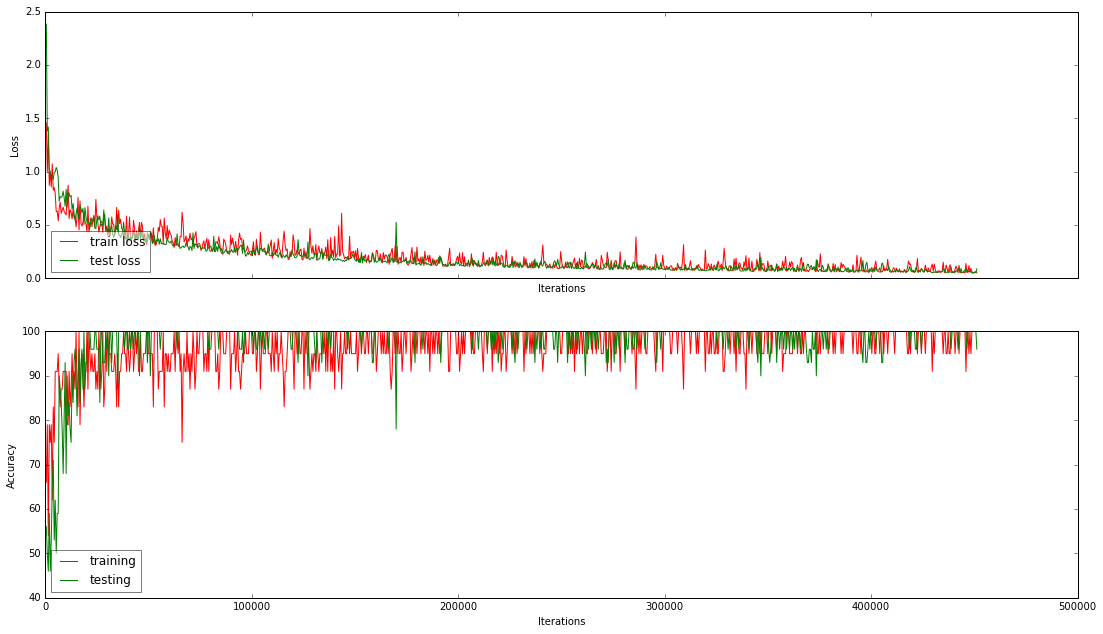

Iter 451200, Loss = 0.050980, Training Accuracy = 100.000, Test Accuracy = 96.000
Hello World! 0.967391 


 Predicted  False  True  All
Actual                     
0              3    47   50
1              0    42   42
All            3    89   92

	------------------------------------------------------


 Predicted   0   1  All
Actual                
0          50   0   50
1           0  42   42
All        50  42   92

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        42

avg / total       1.00      1.00      1.00        92


	------------------------------------------------------

Optimization Terminated!


In [2]:
network = """[{
    "id": "image",
    "arch":[{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 50,
      "stride": 1,
      "maintain_spatial": false
   },{
      "type": "conv",
      "filter_size": 3,
      "filter_count": 30,
      "stride": 1,
      "maintain_spatial": false
   }]
}, {
    "id": "out",
    "arch": [{
      "type": "fc",
      "count": 1024
   }]
}]
"""
NNModel(network, {'image':  [15, 15, 27, 1]}, 2).train(
    'datasets/scaled_repeat_2.p',
    learning_rate=1e-4,
    iterations=1e8, 
    batch_size=24,
    angles = {
        'train': list(range(0, 360, 10)),
        'validate': list(range(0, 360, 360)),
        'test': list(range(0, 360, 360))
    }
)